# Feature summary

We have extracted some features now. Let's load in all of these features and make a summary of what we have here. 

In [43]:
import json

import pandas as pd

%matplotlib inline

In [2]:
feature_file = '../features/features.csv'
features = pd.read_csv(feature_file)

In [24]:
user_dict = {}
for user in json.load(open('../raw_data/users.json', 'rt')):
    try:
        user_dict[user['id']] = user['real_name']
    except KeyError:
        user_dict[user['id']] = user['name']
user_df = pd.DataFrame(pd.Series(user_dict))
user_df.columns = ['name']

In [61]:
user_df.to_dict()['name']

{'U04N457C0': 'Max Albert',
 'U04NRTAEF': 'Elisabeth zu Erbach-Schoenberg',
 'U04PJJX8K': 'Robin Wilson',
 'U04SEMPC0': 'alansmith',
 'U06ET559Q': 'Daniel Power',
 'U06MX2MV1': 'Simon Tudge',
 'U06P2RVD0': 'Miguel Gonzalez',
 'U08GFA539': 'Linus Bengtsson',
 'U09C7M7R9': 'jasondhilton',
 'U0A9U1JB1': 'sam_guthrie',
 'U0B3VH2KE': 'lenka',
 'U0B4JQDJT': 'chrishughes',
 'U0B4S0CTT': 'Chris Brooks',
 'U0BFTU2G3': 'Heather Chamberlain',
 'U0BFWG5N3': 'Jo Wilkin',
 'U0BLS7ZGB': 'Jason Sadler',
 'U0BRYDQ5T': 'Xin Lu',
 'U0CBT2GTV': 'Luis Capelo',
 'U0DRJMHBL': 'Jess Steele',
 'U0FHGPCGK': 'Mathew Kiang',
 'U0WTT399B': 'Laurent Oster',
 'U1AUN84AX': 'Tomas Bird',
 'U1BA2N7A7': 'evam.b.',
 'U1FQYQ552': 'spadarian',
 'U1GALLADP': 'rbergmair-urefraktor',
 'U1HHT2CD7': 'Adam King',
 'U1HQLDC56': 'Vincent Baumgartner',
 'U1K3BSX1P': 'Guilherme Zagatti',
 'U1MAT38UC': 'Annie Sheehan',
 'U23NEDKPU': 'Priya Burci',
 'U2MT46YF6': 'Jonathan Gray',
 'U2WSAQSBG': 'Amy Ninneman',
 'U2YDYMTPS': "Jamie O'Don

In [28]:
features = features.join(user_df, 'user')

## Metadata

How many entries do we have?
How many for each user?

In [29]:
len(features)

2898

In [34]:
features.groupby('name').size().sort(inplace=False, ascending=False)

/home/simontudge/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  if __name__ == '__main__':


name
Max Albert           1487
Luis Capelo           464
Chris Brooks          404
Simon Tudge           321
Miguel Gonzalez       151
Guilherme Zagatti      46
Jonathan Gray          25
dtype: int64

In [58]:
features.groupby('name').size()['Max Albert']/features.groupby('name').size().sum()

0.5131124913733609

## User break down

For each feature do a break down by user. What is the average and distribution for each feature by user. This can either be as a mean or as a box plot or a bar chart.

In [54]:
chanels = ['brief_updates', 'discussion', 'general', 'help',
       'internal_discussions', 'knowledge_base', 'reference']

missing_features = ['help', 'internal_discussions', 'knowledge_base']

In [51]:
mean_features = features.groupby(['name']).mean()

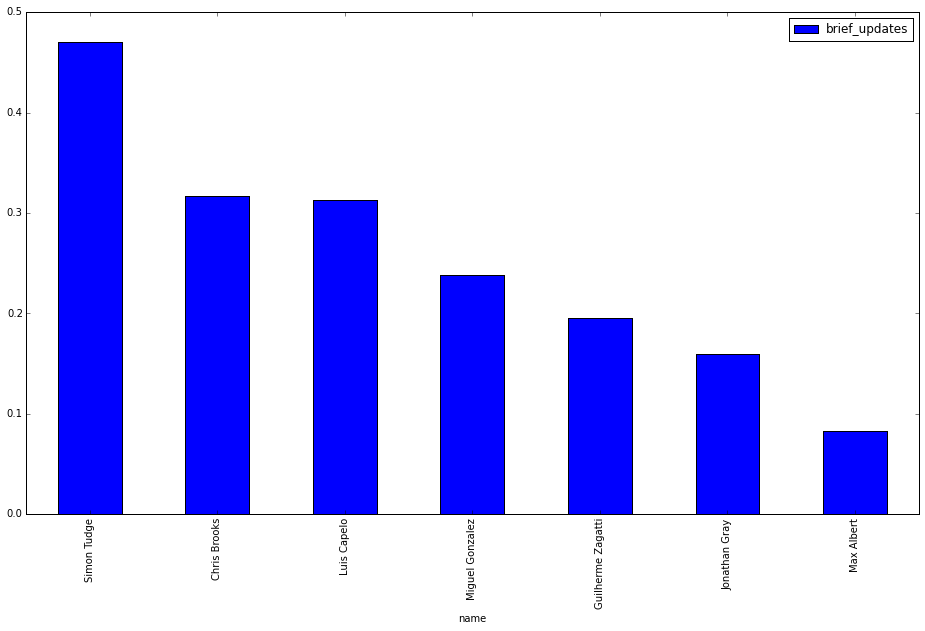

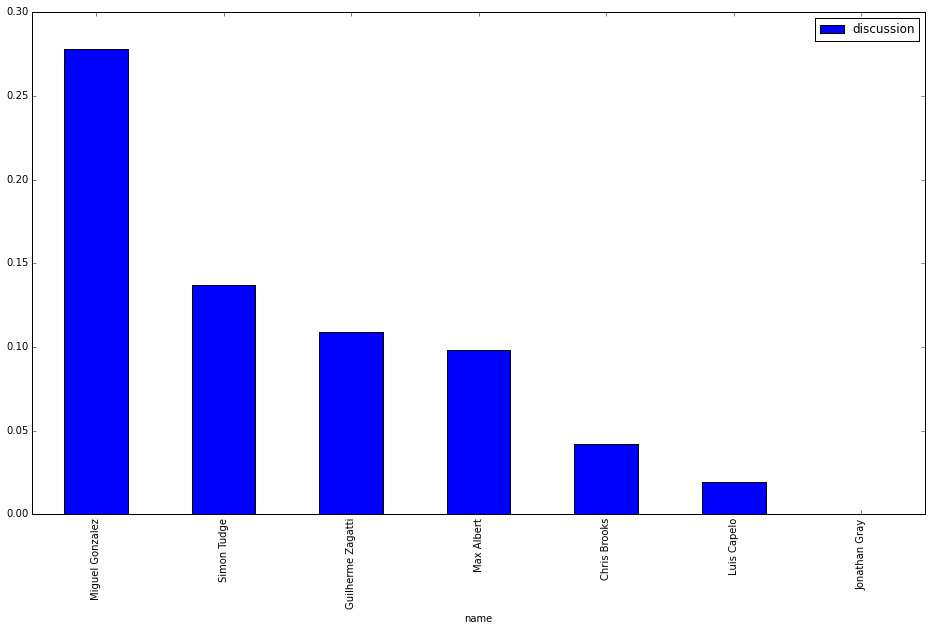

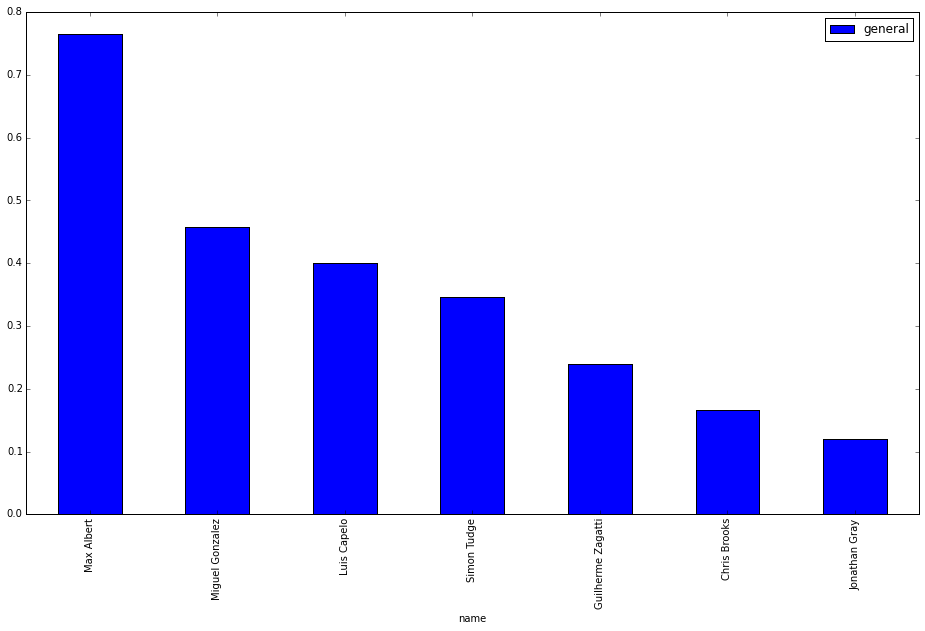

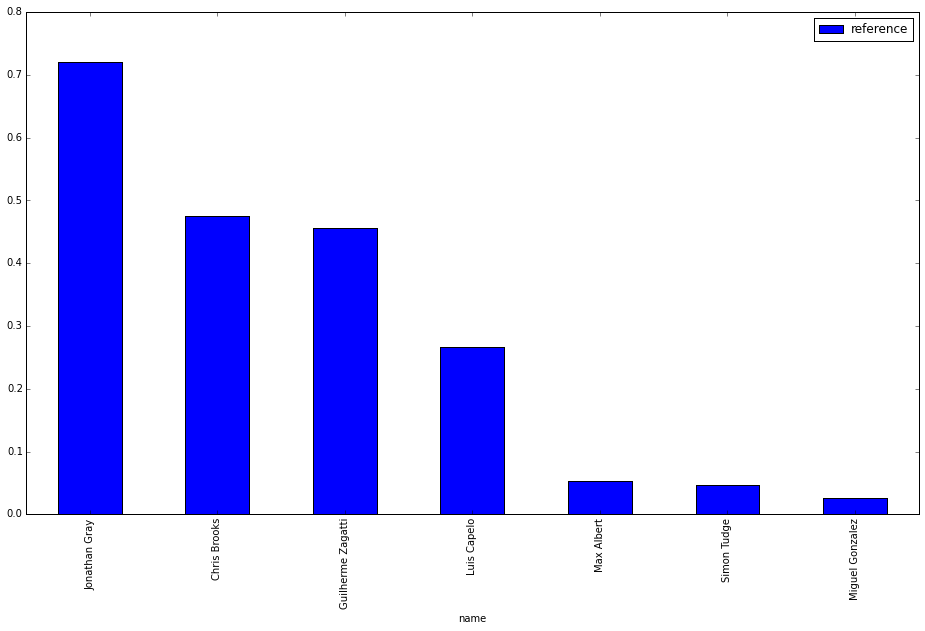

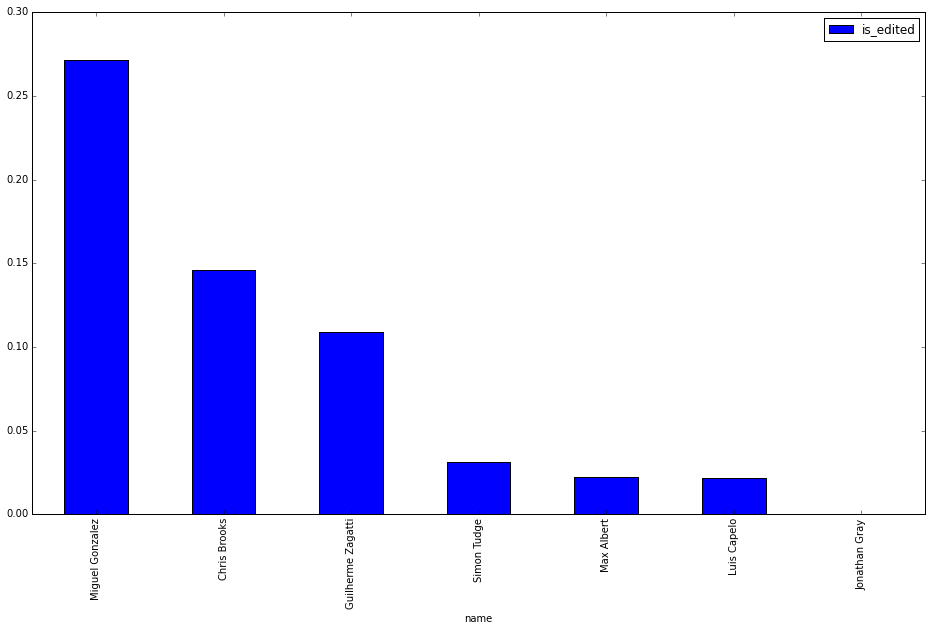

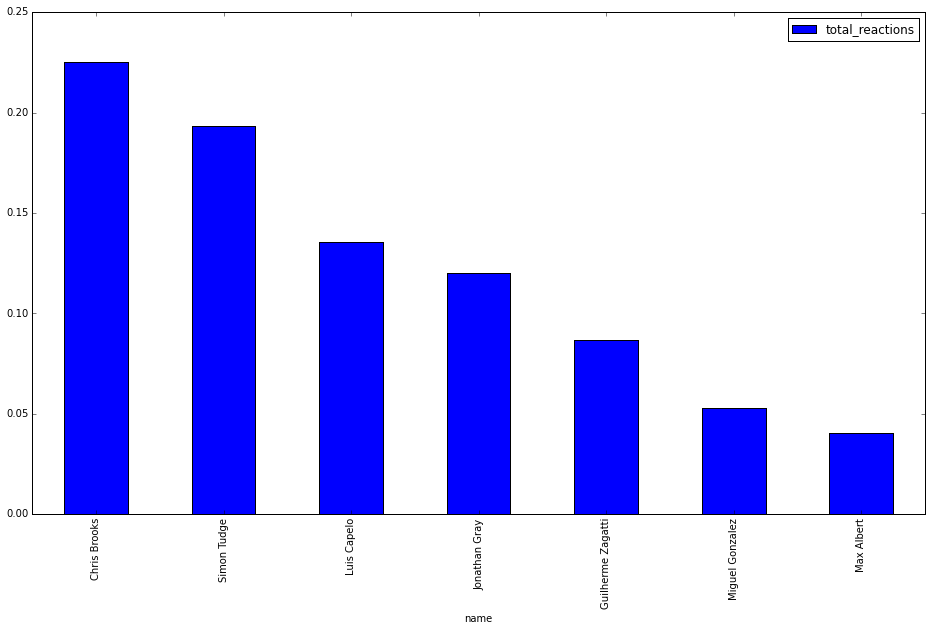

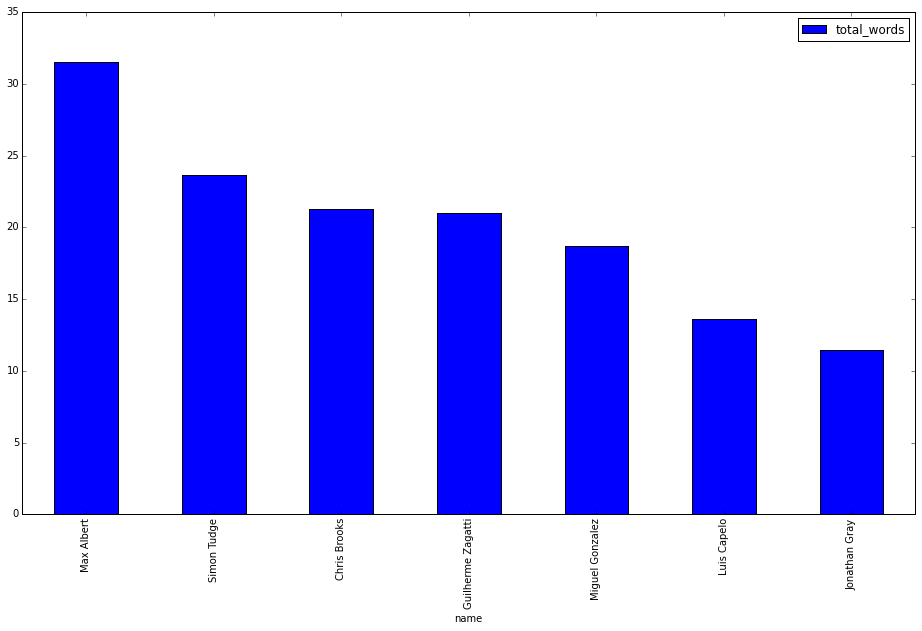

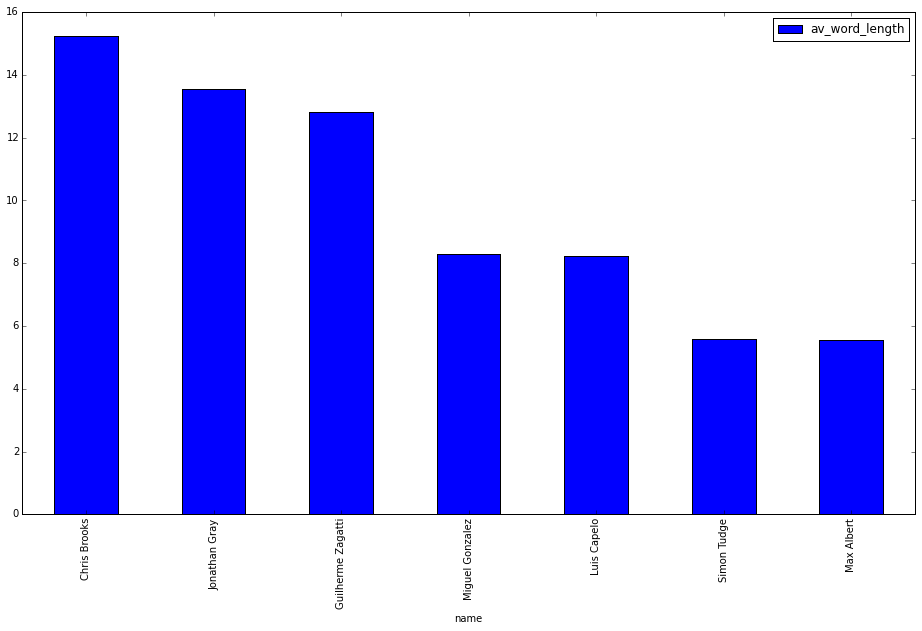

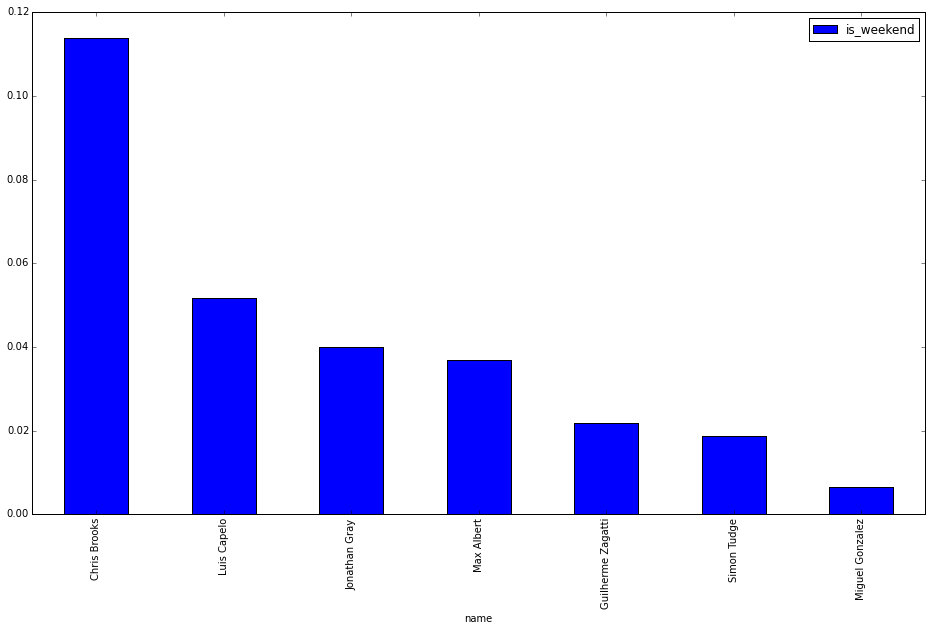

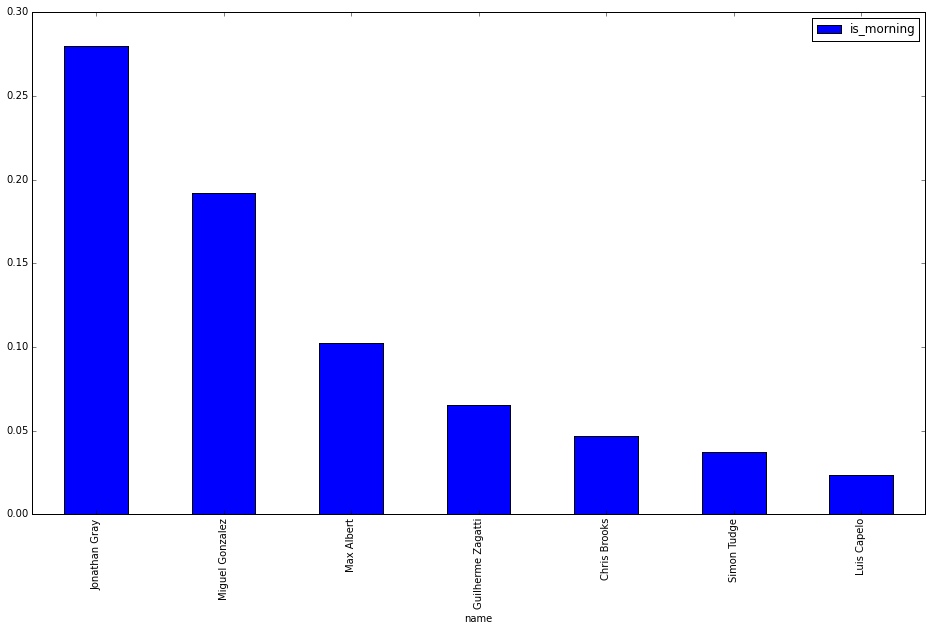

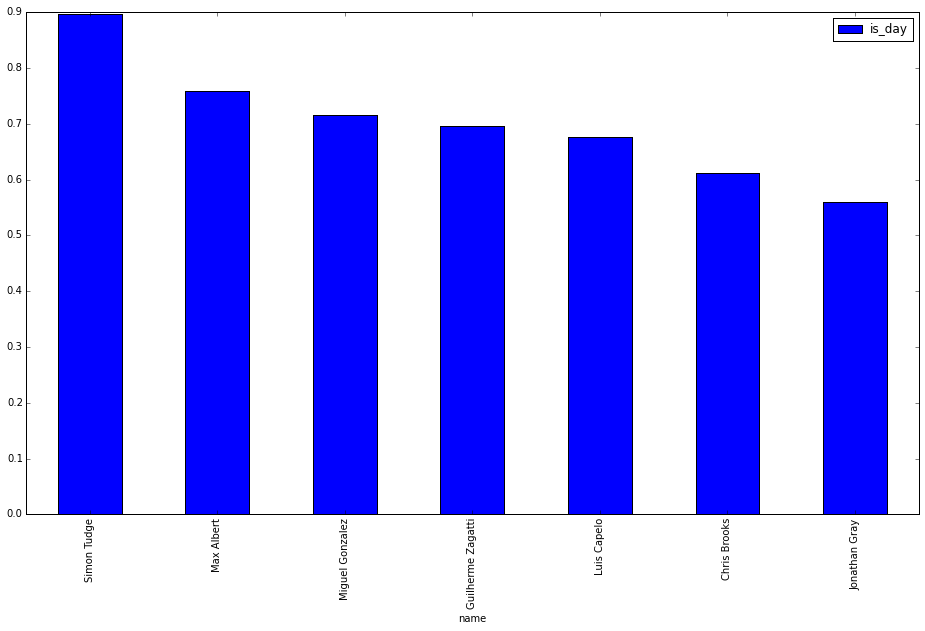

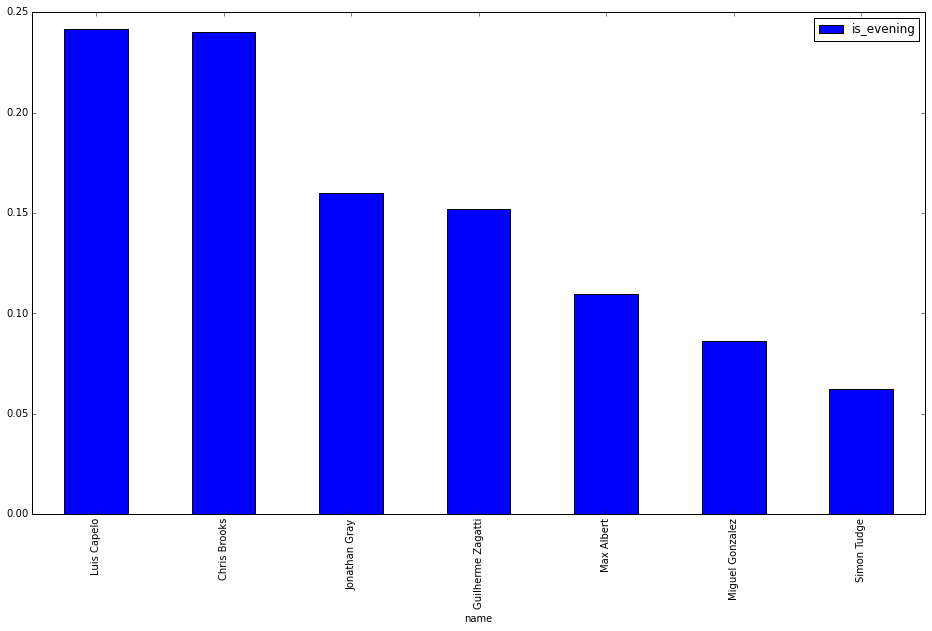

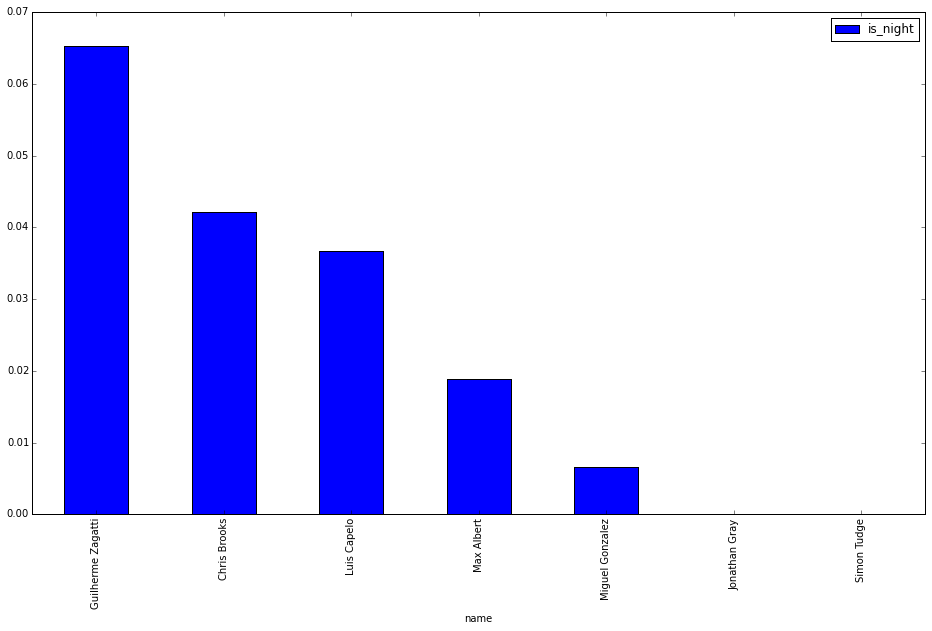

In [55]:
for feature in mean_features:
    if feature in missing_features:
        continue
    mean_features[[feature]].sort_values(feature, ascending=False).plot.bar(figsize=(16,9))

## Conclusions

It seems like there is a fair bit of information in our data, in that people vary quite a lot in their habits, when and where they post, the length of their messages and the length of the words that they use. So it seems that an ML algorithm will be of some use here.

51% of all messages are from Max, so the strategy of always guessing Max would be a good base line to meet. It would have an accuracy of 51%.